In [3]:
from tensorflow.keras.layers import Conv2D,Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.applications.resnet50 import ResNet50 
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt 
import numpy as np


In [4]:
img_height, img_width = (768,768)
batch_size = 32
train_data_dir =r"E:\DeepProject\Whole Data\colon_image_sets" 


In [5]:
train_datagen = ImageDataGenerator(
    horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')


Found 10000 images belonging to 2 classes.


In [6]:
train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data




Found 8000 images belonging to 2 classes.


In [7]:
validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data


Found 2000 images belonging to 2 classes.


In [8]:
base_model = ResNet50(include_top =False, weights = 'imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model (inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy' ])
model.fit(
train_generator,
epochs = 4)

Epoch 1/4
250/250 [==============================] - 3031s 12s/step - loss: 0.0918 - accuracy: 0.9741
Epoch 2/4
250/250 [==============================] - 3415s 14s/step - loss: 0.0063 - accuracy: 0.9983
Epoch 3/4
250/250 [==============================] - 3258s 13s/step - loss: 0.0065 - accuracy: 0.9979
Epoch 4/4
250/250 [==============================] - 3269s 13s/step - loss: 0.0029 - accuracy: 0.9994


In [9]:
model.save("E:\CSCI417\modelResNetDeepLearingColon.h5")

In [10]:
model.save("E:\CSCI417\modelResNetDeepLearingColon")

INFO:tensorflow:Assets written to: E:\CSCI417\modelResNetDeepLearingColon\assets


INFO:tensorflow:Assets written to: E:\CSCI417\modelResNetDeepLearingColon\assets


In [11]:
validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation') # set as validation data


Found 2000 images belonging to 2 classes.


In [12]:
import numpy as np
import pandas as pd 
import seaborn as sn 
import tensorflow as tf

1/1 [==============================] - 0s 471ms/step


1/1 [==============================] - 0s 494ms/step


1/1 [==============================] - 0s 481ms/step


1/1 [==============================] - 0s 483ms/step


1/1 [==============================] - 0s 460ms/step


1/1 [==============================] - 0s 453ms/step


1/1 [==============================] - 0s 472ms/step


1/1 [==============================] - 0s 469ms/step


1/1 [==============================] - 1s 544ms/step


1/1 [==============================] - 1s 538ms/step


1/1 [==============================] - 0s 464ms/step


1/1 [==============================] - 0s 460ms/step


1/1 [==============================] - 0s 466ms/step


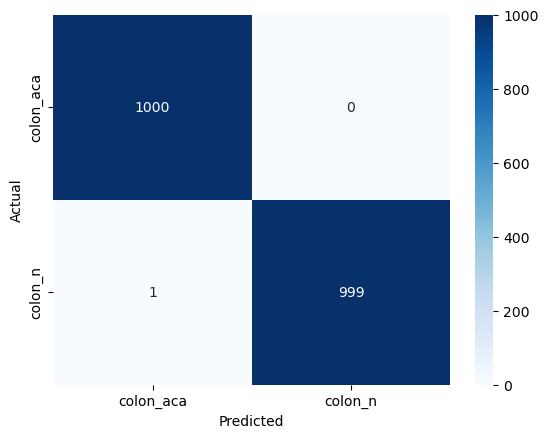

test accuracy: 99.95


In [13]:
model = tf.keras.models.load_model("E:\CSCI417\modelResNetDeepLearingColon.h5")
filenames = validation_generator.filenames
nb_samples = len(validation_generator)
y_prob=[] 
y_act=[]
validation_generator.reset ()
for _ in range(nb_samples):
    X_test, Y_test = validation_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)
predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys ())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class', 'actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn. heatmap(confusion_matrix, cmap= 'Blues', annot=True, fmt='d') 
plt.show()
print('test accuracy: {}' .format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum() *100)))